In [1]:
# !pip install qiskit ipywidgets ibm_quantum_widgets pylatexenc

In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
# account_token_path = 'IBMQ_token.txt'
# with open(account_token_path, "rb") as f:
#     TOKEN = f.read().decode('UTF-8')
#     IBMQ.save_account(TOKEN, overwrite=True)
provider = IBMQ.load_account()

## Classical Markov Chain

In [3]:
import numpy as np
M = np.array([[0, 0.2, 0.8], [0.5, 0, 0.5], [0.1, 0.9, 0]])
v0=np.array([1,0,0])
v1=v0.dot(M)
print(v1)
v2=v0.dot(np.linalg.matrix_power(M, 2))
print(v2)
v3=v0.dot(np.linalg.matrix_power(M, 3))
print(v3)

[0.  0.2 0.8]
[0.18 0.72 0.1 ]
[0.37  0.126 0.504]


In [4]:
# Caclulate how many qubits we need
N = M.shape[0]

In [13]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from numpy import pi

# Inilialise registers
qreg_q = QuantumRegister(2*N, 'q')
creg_c = ClassicalRegister(N, 'c')

# Create Markov Step as a circuit
markov_step = QuantumCircuit(qreg_q)

# Create the Markov Step
## Note: this only works (for now) when N=3
# From state 0 to state 1 and 2
markov_step.cu3(2*np.arccos(np.sqrt(M[0,1])), pi/2, pi/2, qreg_q[0], qreg_q[4])
markov_step.ccx(qreg_q[4], qreg_q[0], qreg_q[5])
markov_step.cx(qreg_q[0], qreg_q[4])

# From state 1 to state 0 and 2
markov_step.cu3(2*np.arccos(np.sqrt(M[1,2])), pi/2, pi/2, qreg_q[1], qreg_q[5])
markov_step.ccx(qreg_q[5], qreg_q[1], qreg_q[3])
markov_step.cx(qreg_q[1], qreg_q[5])

# From state 2 to state 0 and 1
markov_step.cu3(2*np.arccos(np.sqrt(M[2,0])), pi/2, pi/2, qreg_q[2], qreg_q[3])
markov_step.ccx(qreg_q[3], qreg_q[2], qreg_q[4])
markov_step.cx(qreg_q[2], qreg_q[3])

# Swap
markov_step.swap(qreg_q[0], qreg_q[3])
markov_step.swap(qreg_q[1], qreg_q[4])
markov_step.swap(qreg_q[2], qreg_q[5])

# Initialise circuit
circuit = QuantumCircuit(qreg_q,creg_c)

# Initialise state (1,0,0)
circuit.x(0)

# Do the markov step n times
n = 3
for _ in range(n):
    for ins in markov_step:
        circuit.append(ins[0], ins[1], ins[2])
    circuit.reset(qreg_q[N:])

# Measure outcome
circuit.measure(qreg_q[:N], creg_c)

C:\Users\cavalk\AppData\Local\Temp/ipykernel_14244/3559768610.py:14: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  markov_step.cu3(2*np.arccos(np.sqrt(M[0,1])), pi/2, pi/2, qreg_q[0], qreg_q[4])
C:\Users\cavalk\AppData\Local\Temp/ipykernel_14244/3559768610.py:19: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  markov_step.cu3(2*np.arccos(np.sqrt(M[1,2])), pi/2, pi/2, qreg_q[1], qreg_q[5])
C:\Users\cavalk\AppData\Local\Temp/ipykernel_14244/3559768610.py:24: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the Qu

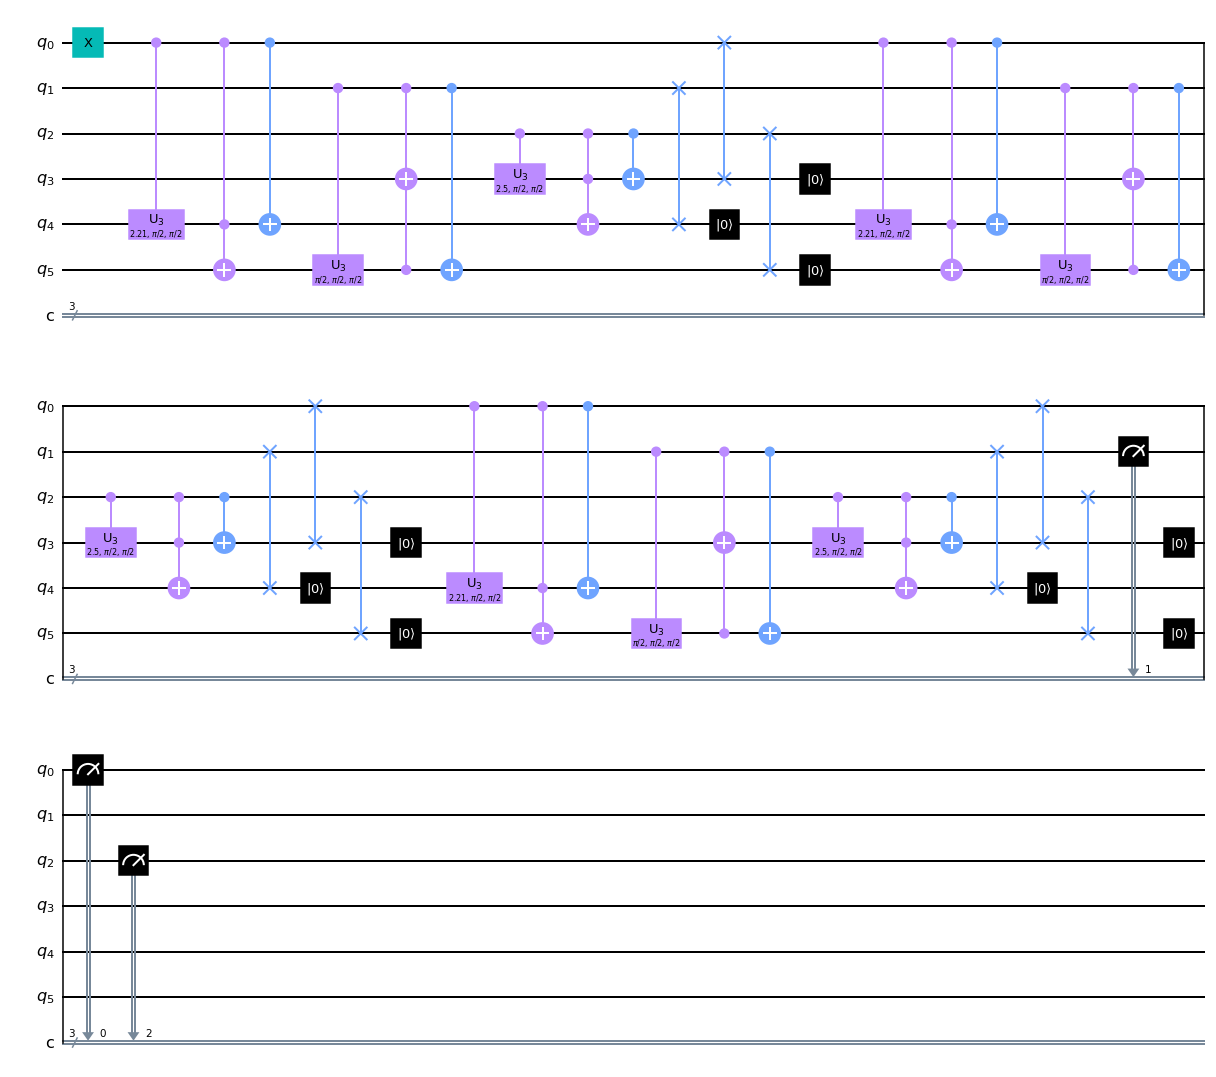

In [14]:
circuit.draw(output='mpl')

In [15]:
backend = provider.get_backend('ibmq_qasm_simulator')
job = backend.run(circuit)
result = job.result()
counts = result.get_counts(circuit)

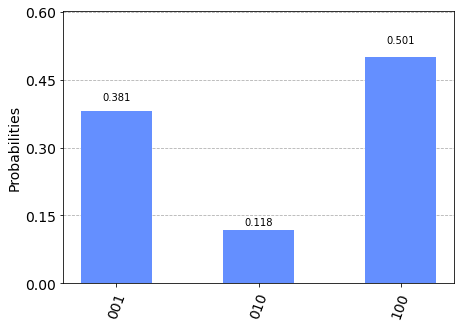

In [16]:
plot_histogram(counts)

In [17]:
v3

array([0.37 , 0.126, 0.504])